In [548]:
import numpy as np 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# EDA 및 전처리

In [549]:
meta_data = pd.read_csv("movies_metadata.csv")
credit_data = pd.read_csv("credits.csv")
keywords = pd.read_csv("keywords.csv")

C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## meta data 살펴보기

In [550]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [551]:
meta_data.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### 중복값 / null값 / 컬럼이 옆으로 밀린 값 제거

In [552]:
# 옆으로 밀린 값 제거
# False 또는 True가 아닌 데이터 확인 => 데이터 자체가 잘못 입력된 것으로 보임. 제외 필요
meta_data.query('adult != "False" and adult != "True"')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [553]:
meta_data = meta_data.drop([meta_data.index[19730],meta_data.index[29503],meta_data.index[35587]])
meta_data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [554]:
# null값이 과도하게 많은 값
meta_data.drop(columns=["belongs_to_collection","homepage","tagline"],inplace=True)

In [555]:
# id 중복값 제거
meta_data.drop_duplicates(['id'], inplace=True)
len(meta_data['id']) - meta_data['id'].nunique()

0

In [556]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45433 non-null  object 
 1   budget                45433 non-null  object 
 2   genres                45433 non-null  object 
 3   id                    45433 non-null  object 
 4   imdb_id               45416 non-null  object 
 5   original_language     45422 non-null  object 
 6   original_title        45433 non-null  object 
 7   overview              44479 non-null  object 
 8   popularity            45430 non-null  object 
 9   poster_path           45047 non-null  object 
 10  production_companies  45430 non-null  object 
 11  production_countries  45430 non-null  object 
 12  release_date          45346 non-null  object 
 13  revenue               45430 non-null  float64
 14  runtime               45173 non-null  float64
 15  spoken_languages   

### 알맞지 않는 데이터 타입 변경

In [557]:
# imdb_id는 전처리 후 처리
meta_data = meta_data.astype({"id":"int","popularity" : "float","budget":"float"})
meta_data["release_date"] = pd.to_datetime(meta_data["release_date"])

In [558]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45433 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 45433 non-null  object        
 1   budget                45433 non-null  float64       
 2   genres                45433 non-null  object        
 3   id                    45433 non-null  int32         
 4   imdb_id               45416 non-null  object        
 5   original_language     45422 non-null  object        
 6   original_title        45433 non-null  object        
 7   overview              44479 non-null  object        
 8   popularity            45430 non-null  float64       
 9   poster_path           45047 non-null  object        
 10  production_companies  45430 non-null  object        
 11  production_countries  45430 non-null  object        
 12  release_date          45346 non-null  datetime64[ns]
 13  revenue         

## 컬럼 정리

In [559]:
meta_data["adult"].value_counts()

False    45424
True         9
Name: adult, dtype: int64

In [560]:
meta_data["video"].value_counts()

False    45337
True        93
Name: video, dtype: int64

In [561]:
# adult와 video는 99%가 False에 있고 imdb_id는 고유 값이므로 삭제해도 무방하다고 생각이 들어 삭제, poster_path는 포스터 주소값이고
# original_title은 title과 유사한 값이기도 하고 
# 모델링의 불피요한 요소라 판단되어 삭제  
meta_data.drop(columns=["imdb_id","adult","poster_path","video","original_title","overview"],inplace=True)

## keyword 데이터 확인

In [562]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [563]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


## credit 데이터 확인

In [564]:
credit_data.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [565]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


# 3개 데이터 merge

In [566]:
df_inner_id = pd.merge(meta_data, keywords, left_on="id", right_on="id",how = "inner")
df_inner_id.head()

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,keywords
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [567]:
merge_data = pd.merge(df_inner_id, credit_data, left_on="id", right_on="id",how = "inner")
merge_data.head()

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,keywords,cast,crew
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


## 컬럼 수정

In [568]:
# null값은 아니지만 []로 키워드가 비워져있는 값 제거
merge_data = merge_data[merge_data["keywords"] != "[]"]

In [569]:
# 날짜 데이터에서 연도 추출
merge_data['year'] = pd.DatetimeIndex(merge_data['release_date']).year

### Weight Rating
```
WR = (v/(v+m)*R) + (m/(m+v)*C)
```
- vote_count값이 모두 달라 가중치를 주기위해 가중치를 통한 평점 값을 정리

In [570]:
C = merge_data["vote_average"].mean()
m =merge_data["vote_count"].quantile(0.95)
def weighted_rating(x):
    v = x["vote_count"]
    R = x["vote_average"]
    return (v/(v+m)*R) + (m/(m+v)*C)

In [571]:
merge_data["WR"] = merge_data.apply(weighted_rating,axis=1)

In [572]:
# WR를 생성했으므로 vote_count와 vote_average삭제
merge_data.drop(columns=["vote_average","vote_count"],inplace=True)

## 2000년대 이후 데이터를 활용
- revenue와 budget은 영화 수익에 관련 된 부분이라 0인 값들은 제거

In [573]:
merge_data = merge_data[merge_data["year"]>=2000]

In [574]:
merge_data = merge_data[merge_data["revenue"]!= 0 ]
merge_data = merge_data[merge_data["budget"]!= 0 ]

In [575]:
merge_data.head(3)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,keywords,cast,crew,year,WR
3071,11000000.0,"[{'id': 35, 'name': 'Comedy'}]",10471,en,10.065450,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Next Friday,"[{'id': 378, 'name': 'prison'}, {'id': 1522, '...","[{'cast_id': 1, 'character': 'Craig Jones', 'c...","[{'credit_id': '52fe43769251416c75011529', 'de...",2000.0,5.927031
3084,90000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",10384,en,5.496624,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Supernova,"[{'id': 577, 'name': 'black people'}, {'id': 1...","[{'cast_id': 6, 'character': 'Nick Vanzant', '...","[{'credit_id': '52fe43639251416c7500e78f', 'de...",2000.0,5.682022
3132,36000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",75531,de,0.907927,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-28,3003296.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Isn't She Great,"[{'id': 1646, 'name': 'autism'}]","[{'cast_id': 10, 'character': 'Jacqueline Susa...","[{'credit_id': '52fe4904c3a368484e1166bb', 'de...",2000.0,5.782011


In [576]:
merge_data["status"].value_counts()

Released           3199
Post Production       1
Name: status, dtype: int64

In [577]:
# 그 중 released 한 값만 사용
merge_data = merge_data[merge_data["status"]== "Released" ]

## merge data 안 dict 변수 정리

In [578]:
merge_data.head(3)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,keywords,cast,crew,year,WR
3071,11000000.0,"[{'id': 35, 'name': 'Comedy'}]",10471,en,10.065450,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Next Friday,"[{'id': 378, 'name': 'prison'}, {'id': 1522, '...","[{'cast_id': 1, 'character': 'Craig Jones', 'c...","[{'credit_id': '52fe43769251416c75011529', 'de...",2000.0,5.927031
3084,90000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",10384,en,5.496624,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Supernova,"[{'id': 577, 'name': 'black people'}, {'id': 1...","[{'cast_id': 6, 'character': 'Nick Vanzant', '...","[{'credit_id': '52fe43639251416c7500e78f', 'de...",2000.0,5.682022
3132,36000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",75531,de,0.907927,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-28,3003296.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Isn't She Great,"[{'id': 1646, 'name': 'autism'}]","[{'cast_id': 10, 'character': 'Jacqueline Susa...","[{'credit_id': '52fe4904c3a368484e1166bb', 'de...",2000.0,5.782011


In [579]:
# 대표 주연 배우 맨앞에 배우 추출 
merge_data["cast"] = merge_data["cast"].apply(literal_eval)
merge_data["cast"] = merge_data["cast"].apply(lambda x : [i["name"] for i in x] if isinstance(x, list) else [])
merge_data["cast"] = merge_data["cast"].apply(lambda x : x[:1])

In [580]:
for i in range(len(merge_data["cast"])):
    try:
         merge_data["cast"][i] = [re.sub(r'[^\w]', '_',re.sub(r'[^\w\s]', '', entry)) for entry in merge_data["cast"][i]]
    except:
        merge_data["cast"][i]  = ['']

C:\Users\alal8\AppData\Local\Temp/ipykernel_25092/1289673983.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data["cast"][i]  = ['']
C:\Users\alal8\AppData\Local\Temp/ipykernel_25092/1289673983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_data["cast"][i] = [re.sub(r'[^\w]', '_',re.sub(r'[^\w\s]', '', entry)) for entry in merge_data["cast"][i]]


In [581]:
# 장르도 대표 장르 한개 추출
merge_data["genres"] = merge_data["genres"].fillna("[]").apply(literal_eval).apply(lambda x : [i["name"] for i in x] if isinstance(x, list) else [])
merge_data["genres"] = merge_data["genres"].apply(lambda x : x[:1])

In [582]:
merge_data = merge_data.astype({"genres":"str"})
merge_data = merge_data.astype({"cast":"str"})

In [583]:
merge_data.head(5)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,keywords,cast,crew,year,WR
3071,11000000.0,['Comedy'],10471,en,10.065450,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Next Friday,"[{'id': 378, 'name': 'prison'}, {'id': 1522, '...",['Ice_Cube'],"[{'credit_id': '52fe43769251416c75011529', 'de...",2000.0,5.927031
3084,90000000.0,['Horror'],10384,en,5.496624,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Supernova,"[{'id': 577, 'name': 'black people'}, {'id': 1...",['James_Spader'],"[{'credit_id': '52fe43639251416c7500e78f', 'de...",2000.0,5.682022
3132,36000000.0,['Drama'],75531,de,0.907927,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-28,3003296.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Isn't She Great,"[{'id': 1646, 'name': 'autism'}]",['Bette_Midler'],"[{'credit_id': '52fe4904c3a368484e1166bb', 'de...",2000.0,5.782011
3166,40000000.0,['Horror'],4234,en,9.738371,"[{'name': 'Konrad Pictures', 'id': 85}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-03,161834276.0,116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Scream 3,"[{'id': 2546, 'name': 'mask'}, {'id': 2573, 'n...",['David_Arquette'],"[{'credit_id': '52fe43b4c3a36847f80690cb', 'de...",2000.0,5.750759
3169,10000000.0,['Action'],29076,en,6.370105,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-04,1631839.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Gun Shy,"[{'id': 293, 'name': 'female nudity'}, {'id': ...",['Sandra_Bullock'],"[{'credit_id': '52fe45c6c3a368484e06e2af', 'de...",2000.0,5.792391


In [584]:
# 불필요하다고 판단되는 컬럼 삭제 production_countries는 영화를 볼때 어느 국가에서 만들었다는 것이 작용을 크게 안할거라고 판단
# production_companies, crew 제작진이 영화 본 사람에게 평점에 영향을 안끼칠것이라고 판단 기대 수치에 대한 것은 있을 수 있지만 관람객에게는 영향이 없을 것이라고 생각
# keyword는 장르와 요약을 내포하고 있어 이부분은 genres로 진행
# original_language 영화 산업이 발전하면서 원래 언어에 대한 것은 없다고 생각 자막과 더빙이 다 되기 떄문
# title 또한 관람객 수나 기대 점수에는 영황을 끼칠 수 잇으나 보고 난 후 평점에는 영향이 없을 것이라고 생각

In [585]:
merge_data.drop(columns=["production_countries","production_companies","crew","keywords","original_language","status","spoken_languages","id"],inplace=True)

In [586]:
merge_data.drop(columns=["title"],inplace=True)

In [587]:
merge_data.drop(columns=["release_date"],inplace=True)

In [588]:
merge_data.head()

,budget,genres,popularity,revenue,runtime,cast,year,WR
3071,11000000.0,['Comedy'],10.065450,59827328.0,98.0,['Ice_Cube'],2000.0,5.927031
3084,90000000.0,['Horror'],5.496624,14828081.0,91.0,['James_Spader'],2000.0,5.682022
3132,36000000.0,['Drama'],0.907927,3003296.0,95.0,['Bette_Midler'],2000.0,5.782011
3166,40000000.0,['Horror'],9.738371,161834276.0,116.0,['David_Arquette'],2000.0,5.750759
3169,10000000.0,['Action'],6.370105,1631839.0,101.0,['Sandra_Bullock'],2000.0,5.792391


<AxesSubplot:>

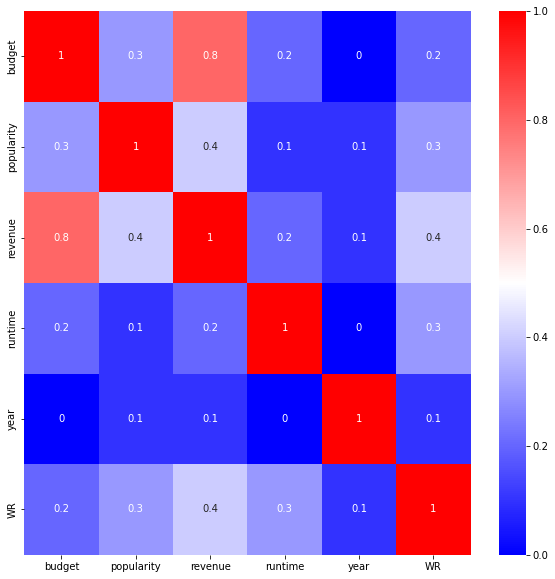

In [589]:
import seaborn as sns
matrix_corr = merge_data.corr().round(1)
plt.figure(figsize=(10,10))
sns.heatmap(data= matrix_corr, annot=True, cmap="bwr")

### 장르와 cast를 labelencode와 onehotencoder를 한꺼번에 처리 할 수 있음 get_dummies를 활용

In [590]:
merge_data = merge_data.astype({"genres":"str"})
merge_data = merge_data.astype({"cast":"str"})

In [591]:
movie_dum= pd.get_dummies(merge_data)

In [592]:
movie_dum.reset_index(drop=True,inplace=True)

# 모델링

In [593]:
X = movie_dum.drop(columns=["WR"]).values
y = movie_dum["WR"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=13)

In [594]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [599]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  0.2638887911059472
RMSE of Test Data :  0.3529446287349637


In [600]:
reg.score(X_test,y_test)

0.2105996531653589

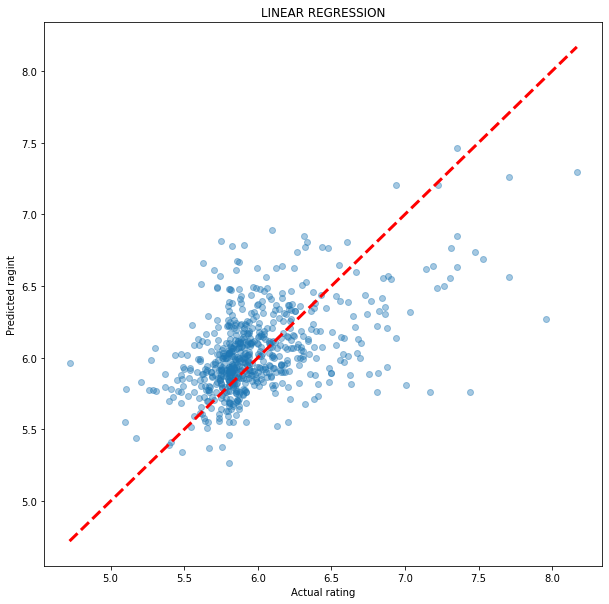

In [601]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, pred_test, alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='dashed', lw=3)
plt.xlabel("Actual rating")
plt.ylabel("Predicted ragint")
plt.title("LINEAR REGRESSION")
plt.show()

In [602]:
# 다중선형회귀 결정계수
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.6659347000804428, 0.2105996531653589)

### stadard scaler 적용 후 시도

In [603]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WR'>

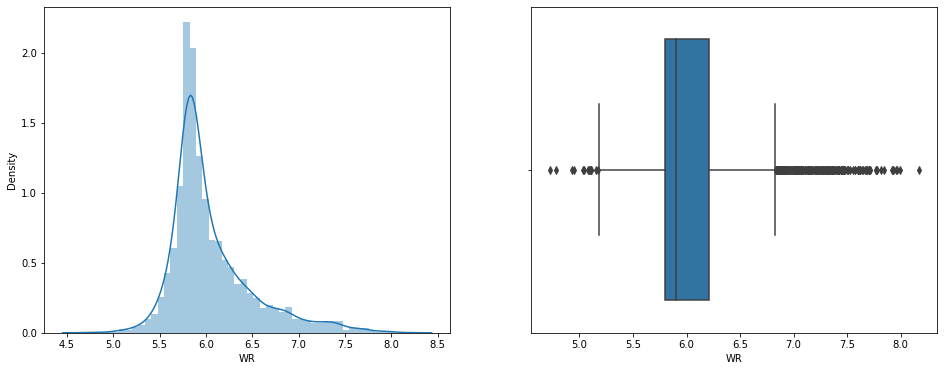

In [604]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movie_dum['WR'], ax=ax[0])
sns.boxplot(movie_dum['WR'], ax=ax[1])

C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='popularity'>

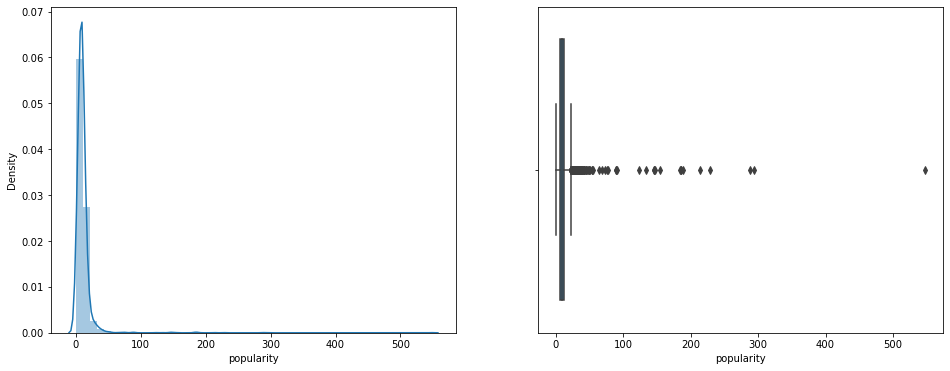

In [605]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movie_dum['popularity'], ax=ax[0])
sns.boxplot(movie_dum['popularity'], ax=ax[1])

C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue'>

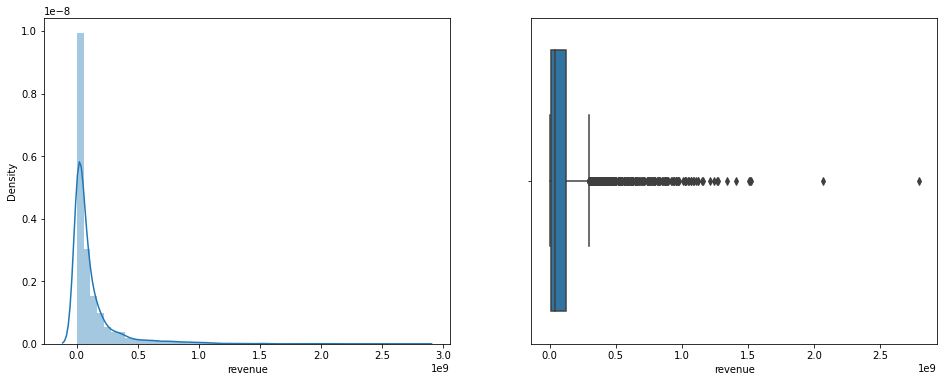

In [606]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movie_dum['revenue'], ax=ax[0])
sns.boxplot(movie_dum['revenue'], ax=ax[1])

C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

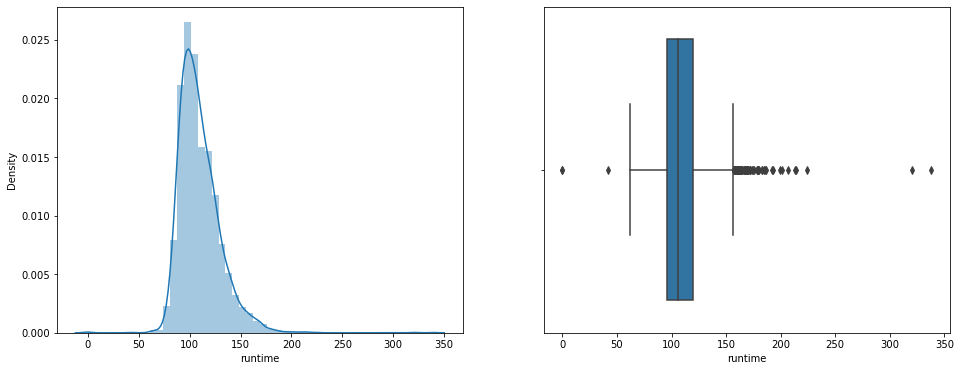

In [607]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movie_dum['runtime'], ax=ax[0])
sns.boxplot(movie_dum['runtime'], ax=ax[1])

C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alal8\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

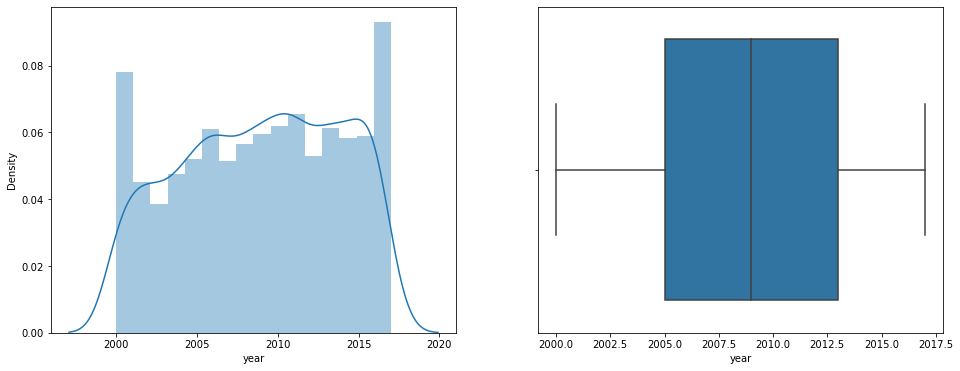

In [608]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.distplot(movie_dum['year'], ax=ax[0])
sns.boxplot(movie_dum['year'], ax=ax[1])

In [609]:
movie_dum.head(3)

,budget,popularity,revenue,runtime,year,WR,genres_['Action'],genres_['Adventure'],genres_['Animation'],genres_['Comedy'],...,cast_['Zhao Wei'],cast_['Zoe Saldana'],cast_['Zoe Sloane'],cast_['Zoe Weizenbaum'],cast_['Zoey Deutch'],cast_['Zooey Deschanel'],cast_['Zsófia Psotta'],cast_['Гордан Кичић'],cast_['杰森·莫玛'],cast_[]
0,11000000.0,10.065450,59827328.0,98.0,2000.0,5.927031,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,90000000.0,5.496624,14828081.0,91.0,2000.0,5.682022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36000000.0,0.907927,3003296.0,95.0,2000.0,5.782011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [610]:
movie_dum[["budget","popularity","revenue","year"]]

,budget,popularity,revenue,year
0,11000000.0,10.065450,59827328.0,2000.0
1,90000000.0,5.496624,14828081.0,2000.0
2,36000000.0,0.907927,3003296.0,2000.0
3,40000000.0,9.738371,161834276.0,2000.0
4,10000000.0,6.370105,1631839.0,2000.0
...,...,...,...,...
3194,60000000.0,50.903593,71000000.0,2017.0
3195,50000000.0,33.694599,66913939.0,2017.0
3196,11000000.0,40.796775,184770205.0,2017.0
3197,12000000.0,1.323587,19000000.0,2007.0


In [611]:
scale_data = movie_dum[["budget","popularity","revenue","year"]]

new_df_ss = ss.fit_transform(scale_data)
new_df_ss = pd.DataFrame(new_df_ss, columns=["budget","popularity","revenue","year"])

In [612]:
new_df_ss

,budget,popularity,revenue,year
0,-0.622238,-0.061488,-0.275125,-1.832323
1,1.073320,-0.330297,-0.506505,-1.832323
2,-0.085669,-0.600276,-0.567306,-1.832323
3,0.000182,-0.080732,0.249381,-1.832323
4,-0.643701,-0.278906,-0.574358,-1.832323
...,...,...,...,...
3194,0.429437,2.341243,-0.217676,1.663580
3195,0.214809,1.328744,-0.238686,1.663580
3196,-0.622238,1.746604,0.367315,1.663580
3197,-0.600775,-0.575820,-0.485053,-0.392834


In [613]:
new_df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      3199 non-null   float64
 1   popularity  3199 non-null   float64
 2   revenue     3199 non-null   float64
 3   year        3199 non-null   float64
dtypes: float64(4)
memory usage: 100.1 KB


In [614]:
movie_dum["budget"] = new_df_ss["budget"]
movie_dum["popularity"] = new_df_ss["popularity"]
movie_dum["revenue"] = new_df_ss["revenue"]
movie_dum["year"] = new_df_ss["year"]


In [615]:
movie_dum.head()

,budget,popularity,revenue,runtime,year,WR,genres_['Action'],genres_['Adventure'],genres_['Animation'],genres_['Comedy'],...,cast_['Zhao Wei'],cast_['Zoe Saldana'],cast_['Zoe Sloane'],cast_['Zoe Weizenbaum'],cast_['Zoey Deutch'],cast_['Zooey Deschanel'],cast_['Zsófia Psotta'],cast_['Гордан Кичић'],cast_['杰森·莫玛'],cast_[]
0,-0.622238,-0.061488,-0.275125,98.0,-1.832323,5.927031,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.073320,-0.330297,-0.506505,91.0,-1.832323,5.682022,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.085669,-0.600276,-0.567306,95.0,-1.832323,5.782011,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000182,-0.080732,0.249381,116.0,-1.832323,5.750759,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.643701,-0.278906,-0.574358,101.0,-1.832323,5.792391,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [616]:
movie_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Columns: 1365 entries, budget to cast_[]
dtypes: float64(6), uint8(1359)
memory usage: 4.3 MB


In [617]:
X = movie_dum.drop(columns=["WR"]).values
y = movie_dum["WR"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=13)

In [618]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [619]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  0.26400377683540077
RMSE of Test Data :  8522489836.194969


## 연속형 데이터만

In [620]:
X = movie_dum[["budget","popularity","revenue","runtime","year"]]
y = movie_dum["WR"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=13)

In [621]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [622]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  0.38857787999272925
RMSE of Test Data :  0.347362908531982


값이 올라가는 것을 보면 범주형 데이터의 인코딩 값이 있으면 더 정확도가 높아진다

## PCA

In [623]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

In [624]:
X = movie_dum.drop(columns=["WR"]).values
y = movie_dum["WR"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=13)

In [625]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [626]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_pca, y_train)

KNeighborsRegressor()

In [627]:
y_pred = model.predict(X_test_pca)
train_score = model.score(X_train_pca, y_train)
test_score = model.score(X_test_pca, y_test)

print(train_score, test_score)

0.47137593607208805 0.14196758832970746


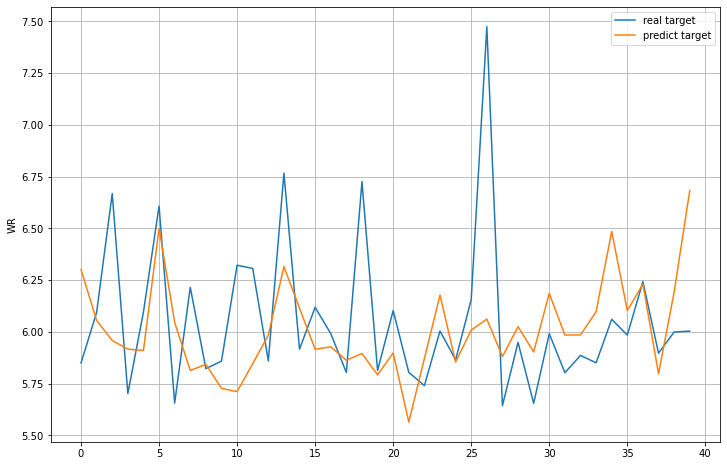

In [628]:
samples = 40
plt.figure(figsize=(12, 8))
plt.plot(range(samples), y_test[:samples], label = 'real target')
plt.plot(range(samples), y_pred[:samples], label = 'predict target')
plt.ylabel('WR')
plt.legend()
plt.grid()
plt.show()